# Polynomial Regression

In [9]:
import matplotlib.pyplot as plt
#pylab was designed to support a MATLAB-like way of working with all plotting related functions directly available in the global namespace.
import pylab as pl
import numpy as np
import pandas as pd

## Reading data 

In [10]:
df=pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [11]:
cdf=df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


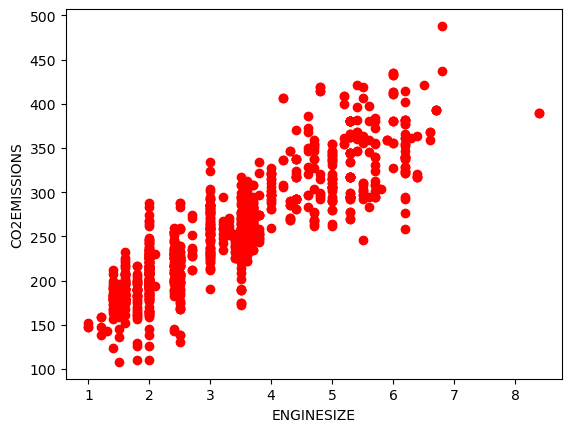

In [8]:
plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS,color='red')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

## Creating train and test data

In [12]:
msk=np.random.rand(len(df))<0.8
train=cdf[msk]
test=cdf[~msk]

# Polynomial Regression model

In [23]:
from sklearn.preprocessing import PolynomialFeatures 
from sklearn import linear_model
train_x=np.asanyarray(train[['ENGINESIZE']])
train_y=np.asanyarray(train[['CO2EMISSIONS']])

test_x=np.asanyarray(test[['ENGINESIZE']])
test_y=np.asanyarray(test[['CO2EMISSIONS']])

#making a matrix consisting of all polynomial combinations of the features with degree 
#less than or  equal to the specified degree. here we set degree = 2, then it generates
#a matrix consisting 3 featuers: degree=0, degree=1 and  degree=2
poly=PolynomialFeatures(degree=2)
#fit_transform: try to make a matrix which the first column is (trian_x)**0,
#the second column is (train_x)**1  and the third is (train_x)**2. we save it as train_x_poly
train_x_poly=poly.fit_transform(train_x)
#as mention before, we have a function which is y=ax**0+bx**1+cx**2 or y=teta0+teta1x+teta2x**2.
#now by making the matrix train_x_poly, we change the x**0 to x1, x**1 to x2 and x**2 to x2
#by doing the above processing, we change the previous function to new simple linear function which is y=teta0+teta1x1+teta2x2. 
#so we can use LinearRegression() now. ha ha :)

In [35]:
clf=linear_model.LinearRegression()
train_y_=clf.fit(train_x_poly,train_y)
#the coefficients
print('Coefficients: ', clf.coef_)
print('Intercept:', clf.intercept_)
#the function is y=113+47x1-1.08x2 --> y=113+47x-1.08x**2

Coefficients:  [[ 0.         47.03029928 -1.08445798]]
Intercept: [113.5017823]


Text(0, 0.5, 'CO2EMISSIONS')

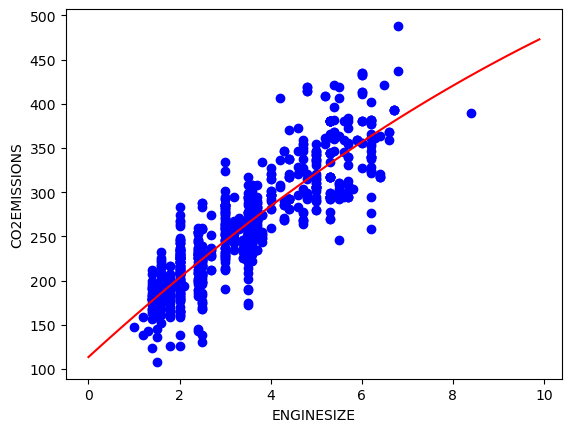

In [34]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,color='blue')
XX=np.arange(0,10,.1)
#print(XX)
yy=clf.intercept_[0]+clf.coef_[0][1]*XX+clf.coef_[0][2]*np.power(XX,2)
plt.plot(XX,yy,'-r')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')

## Evaluation Model

In [39]:
from sklearn.metrics import r2_score
#using fit_transform for data test
test_x_poly=poly.fit_transform(test_x)
test_y_=clf.predict(test_x_poly)

print('mean absolute error: %.2f' % np.mean(np.absolute(test_y_-test_y)))
print('MSE: %.2f' %np.mean((test_y_-test_y)**2))
print('R2-score: %.2f' %r2_score(test_y,test_y_))

mean absolute error: 24.43
MSE: 1050.95
R2-score: 0.74
